In [2]:
!pip install pyLDAvis -qq
!pip install -qq -U gensim
!pip install spacy -qq
!pip install matplotlib -qq
!pip install seaborn -qq
!python -m spacy download en_core_web_md -qq

2023-07-25 18:57:52.426743: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-25 18:57:54.686453: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 MB 10.6 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')


In [3]:
!pip uninstall numpy
!pip install numpy

Found existing installation: numpy 1.25.1
Uninstalling numpy-1.25.1:
  Would remove:
    /usr/local/bin/f2py
    /usr/local/bin/f2py3
    /usr/local/bin/f2py3.10
    /usr/local/lib/python3.10/dist-packages/numpy-1.25.1.dist-info/*
    /usr/local/lib/python3.10/dist-packages/numpy.libs/libgfortran-040039e1.so.5.0.0
    /usr/local/lib/python3.10/dist-packages/numpy.libs/libopenblas64_p-r0-7a851222.3.23.so
    /usr/local/lib/python3.10/dist-packages/numpy.libs/libquadmath-96973f99.so.0.0.0
    /usr/local/lib/python3.10/dist-packages/numpy/*
Proceed (Y/n)? Y
  Successfully uninstalled numpy-1.25.1
  Using cached numpy-1.25.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.6 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
numba 0.56.4 requires numpy<1.24,>=1.18, but you have numpy 1.25.1 which is incompatible.
tensorflow 2.12.0 requires numpy<1.24

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import spacy
import pyLDAvis.gensim_models
pyLDAvis.enable_notebook()# Visualise inside a notebook
import en_core_web_md
from gensim.corpora.dictionary import Dictionary
from gensim.models import LdaMulticore
from gensim.models import CoherenceModel

/usr/local/lib/python3.10/dist-packages/google/rpc/__init__.py:20: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('google.rpc')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#keyword-namespace-packages
  pkg_resources.declare_namespace(__name__)
/usr/local/lib/python3.10/dist-packages/pkg_resources/__init__.py:2349: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('google')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#keyword-namespace-packages
  declare_namespace(parent)


In [2]:
reports = pd.read_csv('LDA_Jin_dataset_samsung.csv')
reports.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,sub-id,group,gender,age,race,employment,income,car,fashion,tech,...,talk_inperson,sns,talk_app,talk_sam,talk_other,text_app,text_sam,text_app.1,comment,purpose
0,sub-01,Samsung,Female,27,White,Employed for wages,"$25,000-$49,999","toyota, subaru","LEVI, CARHART","SAMSUNG, NINTENDO, SONY",...,1,2,0,12,0,0,12,0,IT WAS OK,I'M NOT SURE
1,sub-04,Samsung,Male,35,White,In between jobs,"$25,000-$49,999","Ford Mustang, Dodge Viper, Chevy Camaro, Mitts...","Under Amour, Coach, Champion, No Fear, Ecko","Samsung, Sony, LG, HP",...,0,70,4,5,1,4,4,2,Was alright.,Iphone vs. Samsung
2,sub-05,Samsung,Male,40,White,Employed for wages,"$25,000-$49,999",dodge,gucci,ibm,...,0,150,0,3,0,0,3,0,seems pretty interesting for the most part,smartphones
3,sub-06,Samsung,Female,41,White,A homemaker,"$100,000-$149,999","Porsche, BMW, Acura, Audi, Toyota, Honda, Jeep","Ann Taylor, Marc Jacobs, Banana Republic, LOFT","Samsung, Sony, Google",...,2,200,3,0,7,3,0,7,It was fine - everything worked well.,I'm really not sure.
4,sub-07,Samsung,Male,39,White,In between jobs,"Less than $25,000","Volkswagen, Hyundai, Subaru","Carhartt, North Face, Columbia","Samsung, LG, HP",...,1,40,3,5,2,5,3,2,I don't understand.,I'm not sure.


In [3]:
reports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224 entries, 0 to 223
Data columns (total 32 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   sub-id         224 non-null    object 
 1   group          224 non-null    object 
 2   gender         224 non-null    object 
 3   age            224 non-null    int64  
 4   race           224 non-null    object 
 5   employment     224 non-null    object 
 6   income         224 non-null    object 
 7   car            224 non-null    object 
 8   fashion        221 non-null    object 
 9   tech           223 non-null    object 
 10  purchase       224 non-null    object 
 11  history        224 non-null    float64
 12  products       224 non-null    int64  
 13  homo_sam       224 non-null    int64  
 14  homo_app       224 non-null    int64  
 15  share_app      224 non-null    int64  
 16  share_sam      224 non-null    int64  
 17  share_other    224 non-null    int64  
 18  network_ap

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [4]:
# Our spaCy model:
nlp = en_core_web_md.load()
# Tags I want to remove from the text
removal= ['ADV','PRON','CCONJ','PUNCT','PART','DET','ADP','SPACE', 'NUM', 'SYM']
tokens = []
for summary in nlp.pipe(reports['purchase']):
   proj_tok = [token.lemma_.lower() for token in summary if token.pos_ not in removal and not token.is_stop and token.is_alpha]
   tokens.append(proj_tok)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [5]:
reports['tokens'] = tokens
reports['tokens']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0      [samsung, basically, phone, brand, like, apple...
1      [good, possible, design, functionality, price,...
2      [cheap, need, storage, space, camera, quality,...
3      [need, phone, research, see, local, best, buy,...
4      [good, luck, samsung, product, television, mem...
                             ...                        
219    [buy, current, phone, brand, samsung, phone, y...
220    [choose, positive, experience, android, servic...
221    [purchase, app, want, run, decent, time, good,...
222    [big, fan, apple, viable, choice, android, rec...
223    [buy, current, smartphone, brand, want, good, ...
Name: tokens, Length: 224, dtype: object

In [6]:
#Apply the Dictionary Object from Gensim, which maps each word to their unique ID:
dictionary = Dictionary(reports['tokens'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [7]:
print(dictionary.token2id)

{'apple': 0, 'basically': 1, 'brand': 2, 'crash': 3, 'like': 4, 'lot': 5, 'phone': 6, 'phones': 7, 'run': 8, 'samsung': 9, 'slow': 10, 'deal': 11, 'design': 12, 'functionality': 13, 'functioning': 14, 'good': 15, 'perform': 16, 'possible': 17, 'price': 18, 'solid': 19, 'sure': 20, 'try': 21, 'camera': 22, 'cheap': 23, 'need': 24, 'quality': 25, 'rate': 26, 'space': 27, 'storage': 28, 'best': 29, 'buy': 30, 'easy': 31, 'feature': 32, 'get': 33, 'local': 34, 'research': 35, 'review': 36, 'see': 37, 'start': 38, 'stock': 39, 'transfer': 40, 'unlock': 41, 'card': 42, 'dependable': 43, 'fair': 44, 'luck': 45, 'memory': 46, 'product': 47, 'television': 48, 'use': 49, 'alrig': 50, 'alright': 51, 'att': 52, 'charge': 53, 'decide': 54, 'different': 55, 'g': 56, 'galaxy': 57, 'great': 58, 'monthly': 59, 'new': 60, 'offer': 61, 'old': 62, 'pay': 63, 'service': 64, 'switch': 65, 'talk': 66, 'think': 67, 'work': 68, 'android': 69, 'ease': 70, 'performance': 71, 'system': 72, 'advancement': 73, 'bou

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [8]:
dictionary.filter_extremes(no_below=5, no_above=0.5, keep_n=1000)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [9]:
corpus = [dictionary.doc2bow(doc) for doc in reports['tokens']]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [10]:
lda_model = LdaMulticore(corpus=corpus, id2word=dictionary, iterations=50, num_topics=10, workers = 4, passes=10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


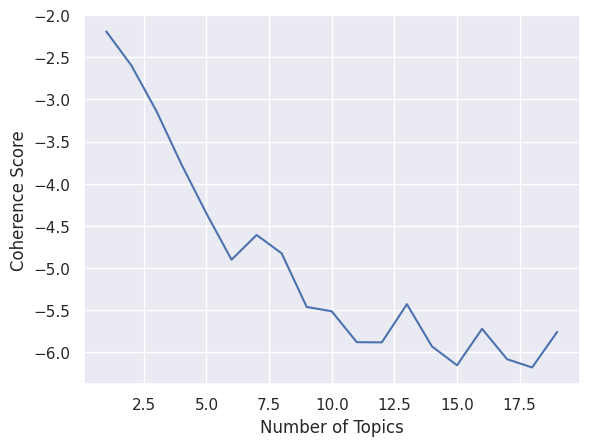

In [11]:
topics = []
score = []
for i in range(1,20,1):
   lda_model = LdaMulticore(corpus=corpus, id2word=dictionary, iterations=10, num_topics=i, workers = 4, passes=10, random_state=100)
   cm = CoherenceModel(model=lda_model, corpus=corpus, dictionary=dictionary, coherence='u_mass')
   topics.append(i)
   score.append(cm.get_coherence())
_=plt.plot(topics, score)
_=plt.xlabel('Number of Topics')
_=plt.ylabel('Coherence Score')
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


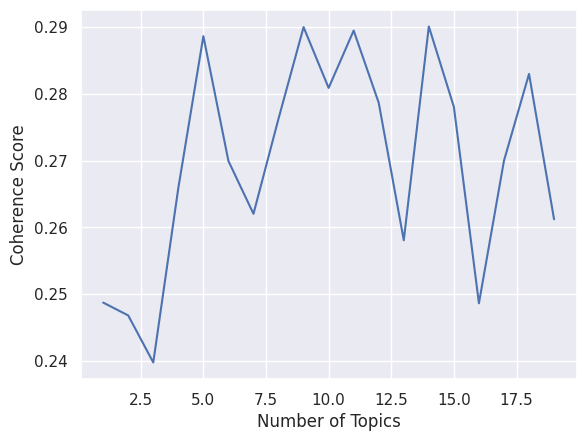

In [12]:
topics = []
score = []
for i in range(1,20,1):
   lda_model = LdaMulticore(corpus=corpus, id2word=dictionary, iterations=10, num_topics=i, workers = 4, passes=10, random_state=100)
   cm = CoherenceModel(model=lda_model, texts = reports['tokens'], corpus=corpus, dictionary=dictionary, coherence='c_v')
   topics.append(i)
   score.append(cm.get_coherence())
_=plt.plot(topics, score)
_=plt.xlabel('Number of Topics')
_=plt.ylabel('Coherence Score')
plt.show()

In [13]:
lda_model = LdaMulticore(corpus=corpus, id2word=dictionary, iterations=100, num_topics=5, workers = 4, passes=100)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [14]:
lda_model.print_topics(-1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.087*"year" + 0.071*"brand" + 0.037*"current" + 0.034*"smartphone" + 0.033*"old" + 0.031*"reliable" + 0.030*"galaxy" + 0.025*"store" + 0.025*"past" + 0.023*"use"'),
 (1,
  '0.064*"quality" + 0.041*"new" + 0.040*"good" + 0.040*"time" + 0.033*"buy" + 0.032*"price" + 0.032*"love" + 0.026*"upgrade" + 0.026*"old" + 0.026*"camera"'),
 (2,
  '0.119*"brand" + 0.065*"buy" + 0.045*"like" + 0.031*"smartphone" + 0.024*"new" + 0.024*"year" + 0.022*"current" + 0.022*"feature" + 0.021*"great" + 0.021*"model"'),
 (3,
  '0.063*"like" + 0.061*"android" + 0.057*"want" + 0.048*"buy" + 0.045*"good" + 0.044*"apple" + 0.038*"feature" + 0.028*"use" + 0.024*"product" + 0.023*"brand"'),
 (4,
  '0.075*"good" + 0.068*"brand" + 0.054*"need" + 0.036*"offer" + 0.033*"apple" + 0.030*"like" + 0.030*"smartphone" + 0.027*"price" + 0.026*"get" + 0.025*"think"')]

In [15]:
# Where does a text belong to
lda_model[corpus][0]
reports['purchase'][0]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


'SAMSUNG IS BASICALLY THE ONLY PHONE BRAND I LIKE. I HATE APPLE PHONES AND ALL OF THE OTHER PHONE BRANDS RUN REALLY SLOW AND CRASH A LOT.'

In [16]:
# Visualize topics
lda_display = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(lda_display)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [17]:
# Save the report
pyLDAvis.save_html(lda_display, 'index.html')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
